In [1]:
%load_ext autoreload
%autoreload 1
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

In [2]:
%aimport lab2

In [3]:
f = lab2.Call_counter(lab2.f1)
x_0 = lab2.f1_0
lab2.nelde_mead(f, x_0), x_0, f.count()

(array([ 1.00000025,  1.00000045]), array([-1.9,  2. ]), 195)

# 1

Definirajte jednodimenzijsku funkciju br. 3, koja će imati minimum u točki 3. Kao početnu točku
pretraživanja postavite točku 10. Primijenite sva tri postupka na rješavanje ove funkcije te ispišite
pronađeni minimum i broj evaluacija funkcije za svaki pojedini postupak. Probajte sve više
udaljavati početnu točku od minimuma i probajte ponovo pokrenuti navedene postupke. Što možete
zaključiti? 

In [4]:
opt = [lab2.nelde_mead, lab2.coordinate_descent, lab2.hook_jeeves]

for op in opt:
    f = lab2.Call_counter(lab2.f3)
    xopt = op(f, np.array([10,0,0], dtype=np.float32))
    print(op.__name__, xopt, f.count())

nelde_mead [ 1.00000024  2.00000072  3.00000095] 170
coordinate_descent [ 1.  2.  3.] 222
hook_jeeves [ 1.  2.  3.] 169


In [5]:
for op in opt:
    f = lab2.Call_counter(lab2.f3)
    xopt = op(f, np.array([20,0,0], dtype=np.float32))
    print(op.__name__, xopt, f.count())

nelde_mead [ 1.00000048  1.99999976  2.99999952] 216
coordinate_descent [ 1.00000012  2.          3.        ] 223
hook_jeeves [ 1.  2.  3.] 176


In [6]:
for op in opt:
    f = lab2.Call_counter(lab2.f3)
    xopt = op(f, np.array([30,0,0], dtype=np.float32))
    print(op.__name__, xopt, f.count())

nelde_mead [ 0.99999976  2.00000048  2.99999952] 222
coordinate_descent [ 1.  2.  3.] 227
hook_jeeves [ 1.  2.  3.] 195


# 2

Primijenite simpleks po Nelderu i Meadu, Hooke-Jeeves postupak te pretraživanje po koordinatnim
osima na funkcije 1-4 uz zadane parametre i početne točke (broj varijabli funkcije 3 najmanje 5). Za
svaki postupak i svaku funkciju odredite minimum koji su postupci pronašli i potrebni broj
evaluacija funkcije cilja koji je potreban do konvergencije (prikažite tablično). Što možete zaključiti
iz rezultata? 

In [7]:
func = [lab2.f1, lab2.f2, lab2.f3, lab2.f4]
x_0 = [lab2.f1_0, lab2.f2_0, np.zeros(5, dtype=np.float32), lab2.f4_0]


gg = []
for ff, x_0 in zip(func, x_0):
    for op in opt:
        f = lab2.Call_counter(ff)
        x = op(f, x_0)
        row = [ff.__name__, x_0, x, op.__name__, f.count()]
        gg.append(row)
df = pd.DataFrame(gg, columns=["f", "x_0", "x", "algo", "iter"])
df        

,f,x_0,x,algo,iter
0,f1,"[-1.9, 2.0]","[1.00000025168, 1.0000004493]",nelde_mead,195
1,f1,"[-1.9, 2.0]","[0.999841285976, 0.999682395459]",coordinate_descent,229744
2,f1,"[-1.9, 2.0]","[1.00000152588, 1.0000038147]",hook_jeeves,378
3,f2,"[0.1, 0.3]","[4.00000005793, 1.99999941747]",nelde_mead,106
4,f2,"[0.1, 0.3]","[3.99999995672, 2.00000003852]",coordinate_descent,164
5,f2,"[0.1, 0.3]","[3.99999961853, 2.00000076294]",hook_jeeves,119
6,f3,"[0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 2.0, 3.0, 4.0, 5.0]",nelde_mead,426
7,f3,"[0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 2.0, 3.0, 4.0, 5.0]",coordinate_descent,358
8,f3,"[0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 2.0, 3.0, 4.0, 5.0]",hook_jeeves,242
9,f4,"[5.1, 1.1]","[-7.8353274332e-07, 6.28515547702e-07]",nelde_mead,131


# 3

Primijenite postupak Hooke-Jeeves i simpleks po Nelderu i Meadu na funkciju 4 uz početnu točku
(5, 5). Objasnite rezultate! 

In [8]:
lab2.nelde_mead(lab2.f4, np.array([5.0,5.0]))

array([  5.23805589e-07,   3.89965473e-07])

In [9]:
lab2.hook_jeeves(lab2.f4, np.array([5.0,5.0]))  # Malo se zbedirao

array([ 5.,  5.])

# 4
Primijenite simpleks po Nelderu i Meadu na funkciju 1. Kao početnu točku postavite točku (0.5,0.5).
Provedite postupak s nekoliko različitih koraka za generiranje početnog simpleksa (primjerice iz
intervala od 1 do 20) i zabilježite potreban broj evaluacija funkcije cilja i pronađene točke
minimuma. Potom probajte kao početnu točku postaviti točku (20,20) i ponovo provesti eksperiment.
Što možete zaključiti? 

In [10]:
gg = []

for x_0 in [[0.5, 0.5], [20,20]]:
    for shift in range(1, 21):
        f = lab2.Call_counter(lab2.f1)
        x = lab2.nelde_mead(f, np.array(x_0, dtype=np.float32), shift=shift)
        row = [ff.__name__, x_0, x, shift, f.count()]
        gg.append(row)
df = pd.DataFrame(gg, columns=["f", "x_0", "x", "shift", "iter"])
df        

,f,x_0,x,shift,iter
0,f4,"[0.5, 0.5]","[1.0, 1.0]",1,111
1,f4,"[0.5, 0.5]","[1.0, 0.999999]",2,203
2,f4,"[0.5, 0.5]","[1.0, 1.0]",3,146
3,f4,"[0.5, 0.5]","[0.999999, 0.999999]",4,177
4,f4,"[0.5, 0.5]","[0.350617, 0.126542]",5,87
5,f4,"[0.5, 0.5]","[0.999999, 0.999999]",6,239
6,f4,"[0.5, 0.5]","[0.5, 0.5]",7,88
7,f4,"[0.5, 0.5]","[1.0, 1.0]",8,169
8,f4,"[0.5, 0.5]","[0.31543, 0.108887]",9,91
9,f4,"[0.5, 0.5]","[1.0, 1.0]",10,143


In [11]:
df['dist'] = (df['x'] - np.array([1,1])).apply(np.linalg.norm)

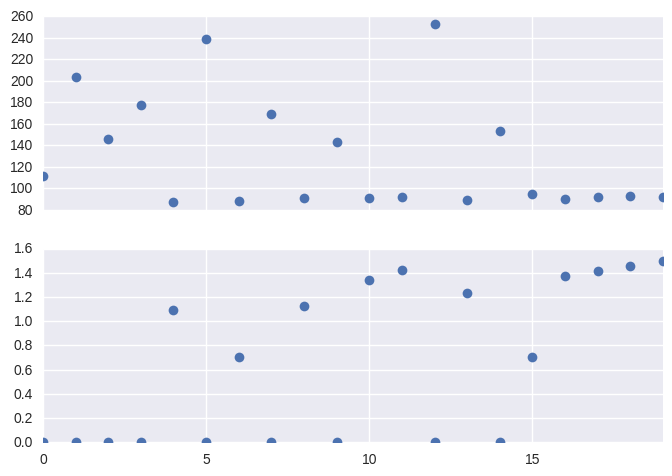

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
df[:20]["iter"].plot(ax=ax1, style='o')
df[:20]["dist"].plot(ax=ax2, style='o')

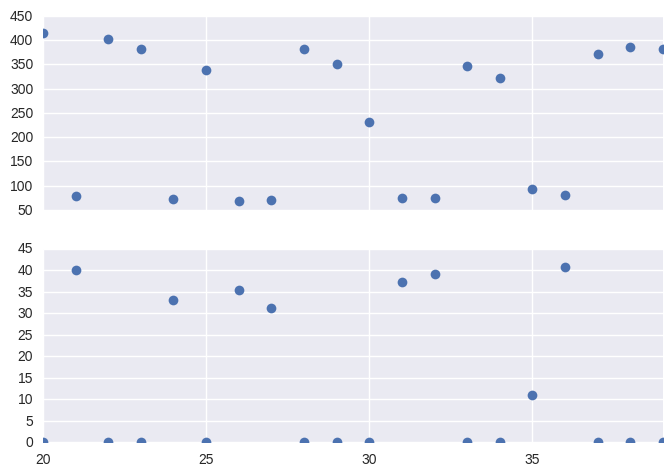

In [13]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
df[20:]["iter"].plot(ax=ax1, style='o')
df[20:]["dist"].plot(ax=ax2, style='o')

# 5

Primijenite jedan postupak optimizacije na funkciju 6 u dvije dimenzije, tako da postupak pokrećete
više puta iz slučajno odabrane početne točke u intervalu [-50,50]. Možete li odrediti vjerojatnost
pronalaženja globalnog optimuma na ovaj način? (smatramo da je algoritam locirao globalni
minimum ako je nađena vrijednost funkcije cilja manja od 4
10−
)¸ 

In [14]:
from scipy.optimize import minimize
hit = 0 
n = 1000
for x in range(n):
    g = minimize(lab2.f6, np.random.uniform(-50,50, size=2), method='Nelder-Mead')
#     print(g['x'], g['fun'])
    if g['fun'] < 1e-4:
        hit += 1
        
print(hit/n)

0.215
